In [9]:
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
data = pd.read_csv("/content/3_amsterdam_weekdays.csv")

# Display the first few rows of the dataset
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Drop any rows with missing values
data.dropna(inplace=True)

# Select relevant columns for clustering
X = data[['person_capacity', 'cleanliness_rating', 'guest_satisfaction_overall', 'bedrooms', 'dist', 'metro_dist']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


   Unnamed: 0     realSum     room_type  room_shared  room_private  \
0           0  194.033698  Private room        False          True   
1           1  344.245776  Private room        False          True   
2           2  264.101422  Private room        False          True   
3           3  433.529398  Private room        False          True   
4           4  485.552926  Private room        False          True   

   person_capacity  host_is_superhost  multi  biz  cleanliness_rating  \
0                2              False      1    0                  10   
1                4              False      0    0                   8   
2                2              False      0    1                   9   
3                4              False      0    1                   9   
4                2               True      0    0                  10   

   guest_satisfaction_overall  bedrooms      dist  metro_dist  attr_index  \
0                          93         1  5.022964    2.539380  

In [10]:
# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # You may need to adjust these parameters based on your data
clusters = dbscan.fit_predict(X_scaled)

# Add cluster labels to the dataset
data['cluster'] = clusters

# Display the number of clusters (-1 indicates noise)
print("Number of clusters:", len(set(clusters)))

# Display the number of points in each cluster
print("Number of points in each cluster:")
print(data['cluster'].value_counts())


Number of clusters: 17
Number of points in each cluster:
-1     495
 1     315
 3      93
 4      77
 6      18
 7      15
 8      14
 10     14
 2      13
 12      9
 5       7
 9       7
 0       6
 15      5
 14      5
 11      5
 13      5
Name: cluster, dtype: int64


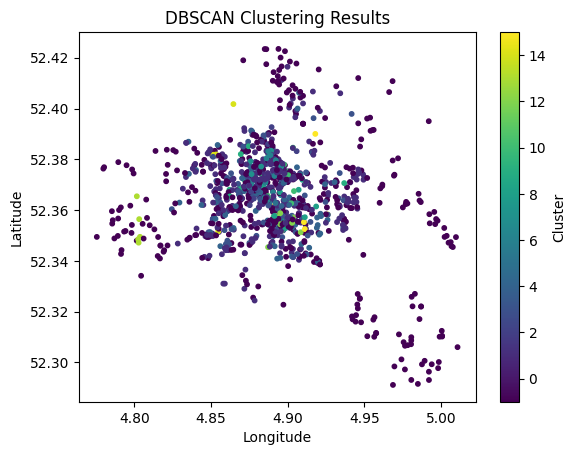

Cluster characteristics:
         Unnamed: 0      realSum  room_shared  room_private  person_capacity  \
cluster                                                                        
-1       547.448485   564.502854     0.008081      0.474747         3.133333   
 0       531.833333   694.154774     0.000000      0.500000         4.000000   
 1       560.838095   432.115917     0.003175      0.631746         2.000000   
 2       450.615385  1082.597715     0.000000      0.000000         4.000000   
 3       549.354839   423.621594     0.010753      0.537634         2.000000   
 4       564.389610   811.100179     0.000000      0.194805         4.000000   
 5       421.428571   740.515080     0.000000      0.714286         3.000000   
 6       581.888889   385.125125     0.000000      0.777778         2.000000   
 7       499.133333  1019.926730     0.000000      0.200000         4.000000   
 8       526.357143   577.665369     0.000000      0.714286         4.000000   
 9       678.28

<ipython-input-11-2166d502e08d>:10: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  cluster_means = data.groupby('cluster').mean()


In [11]:
# Plot the clusters
plt.scatter(data['lng'], data['lat'], c=data['cluster'], cmap='viridis', s=10)
plt.title('DBSCAN Clustering Results')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')
plt.show()

# Analyze cluster characteristics
cluster_means = data.groupby('cluster').mean()
print("Cluster characteristics:")
print(cluster_means)


**Cluster Size Distribution**

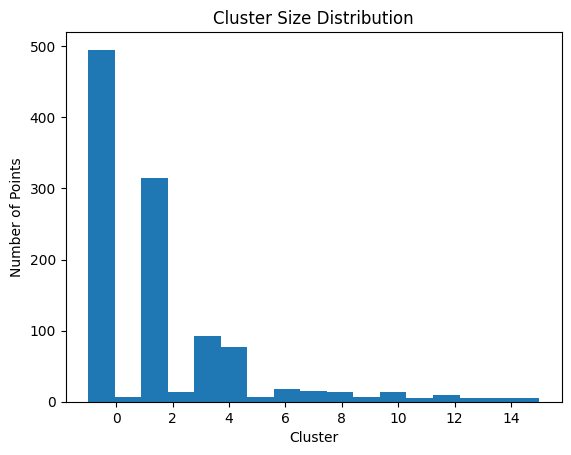

In [12]:
plt.hist(data['cluster'], bins=len(set(clusters)))
plt.title('Cluster Size Distribution')
plt.xlabel('Cluster')
plt.ylabel('Number of Points')
plt.show()

#  visualizations to better understand the dataset


**Correlation Heatmap**

<ipython-input-14-3657f72b8f62>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


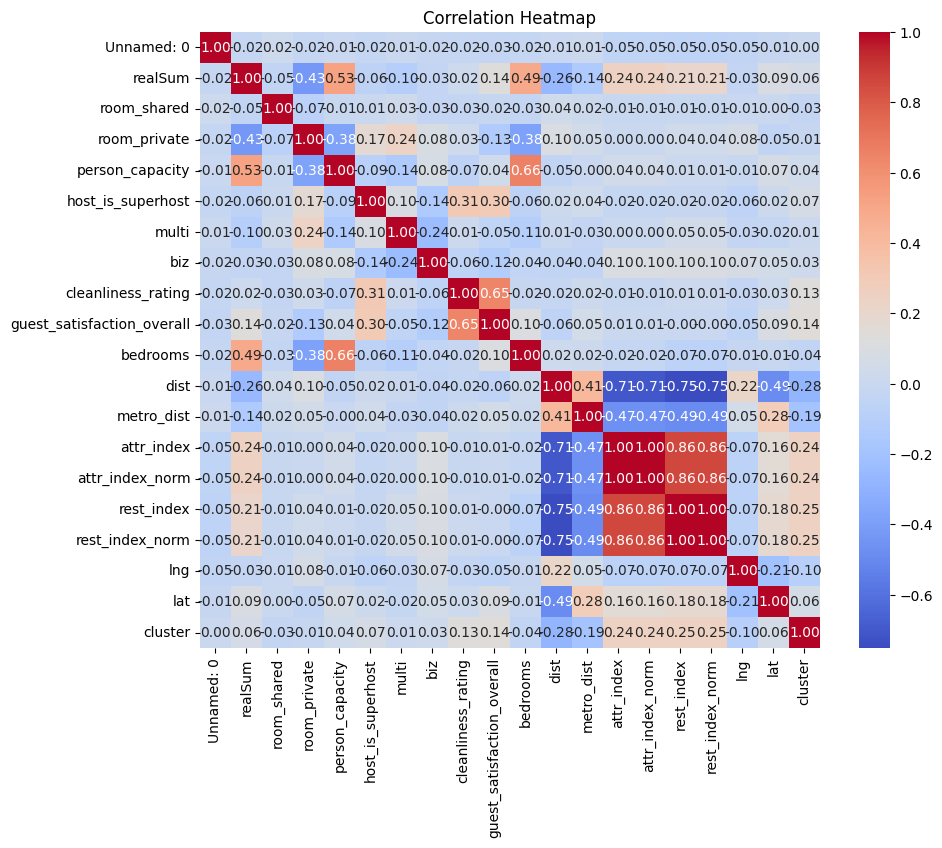

In [14]:
# Calculate correlation matrix
corr_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


**Distribution Plots**

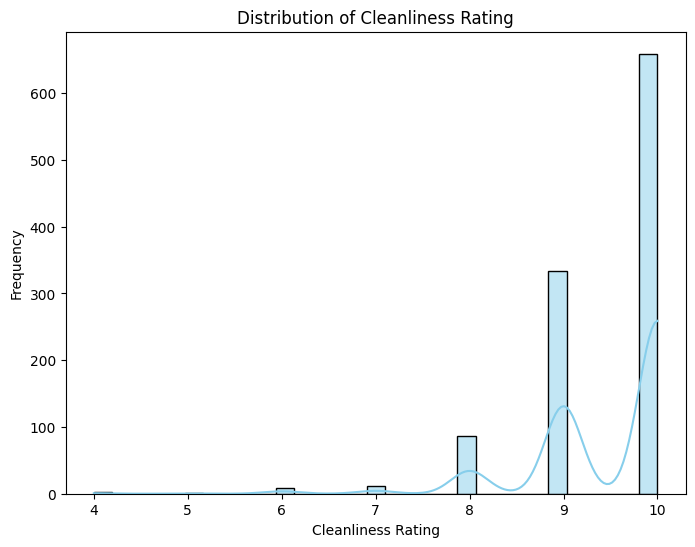

In [15]:
# 'cleanliness_rating' distribution
plt.figure(figsize=(8, 6))
sns.histplot(data['cleanliness_rating'], kde=True, color='skyblue')
plt.title('Distribution of Cleanliness Rating')
plt.xlabel('Cleanliness Rating')
plt.ylabel('Frequency')
plt.show()


**Count Plots**

<ipython-input-16-d0abeb8cfa53>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data['room_type'], palette='Set2')


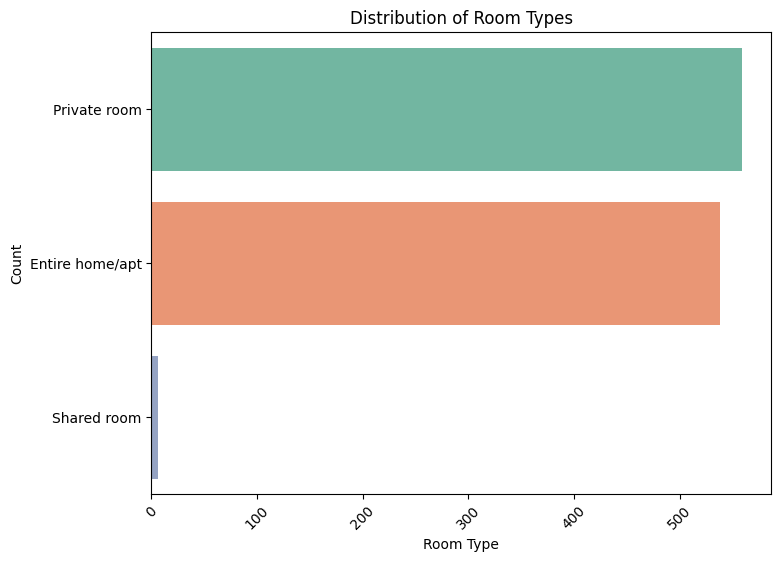

In [16]:
# 'room_type' distribution
plt.figure(figsize=(8, 6))
sns.countplot(data['room_type'], palette='Set2')
plt.title('Distribution of Room Types')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Pairplot**

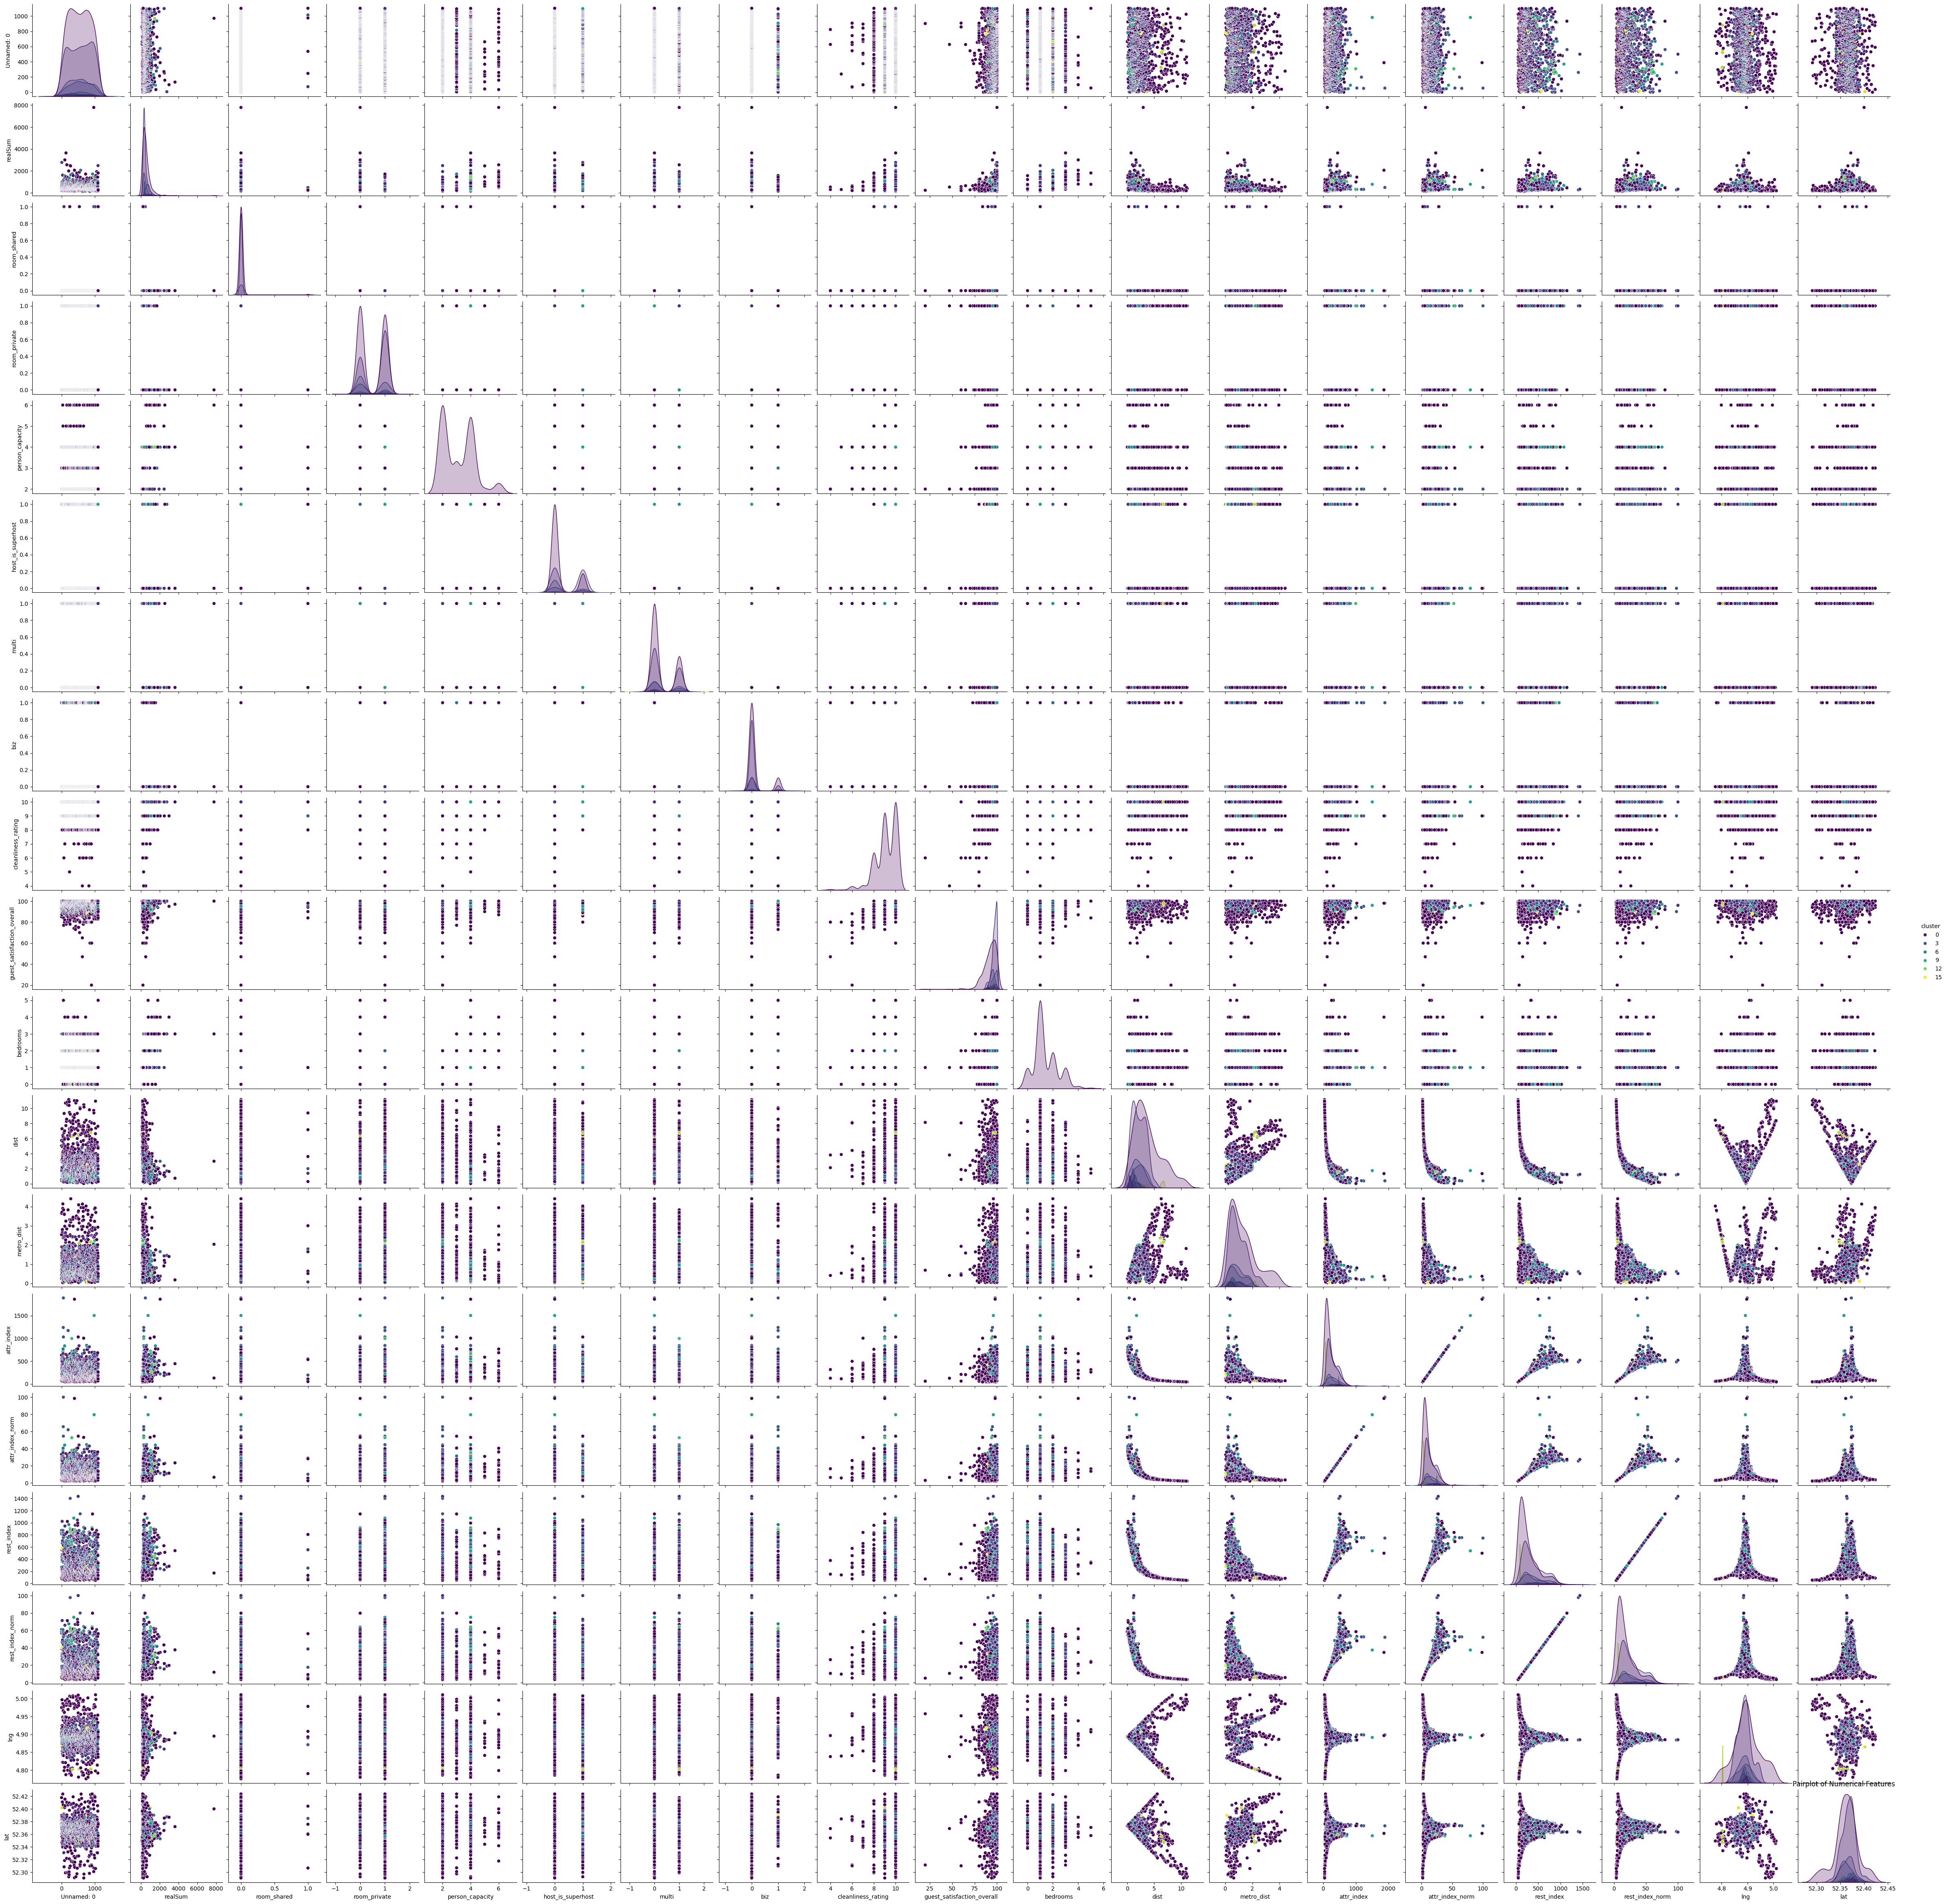

In [17]:
# pairplot colored by cluster labels
sns.pairplot(data, hue='cluster', palette='viridis')
plt.title('Pairplot of Numerical Features')
plt.show()
